# Modelos lineares e regularização

Vamos começar importando as bibliotecas de costume

In [1]:
%matplotlib inline
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

Vamos tambem inicializar o gerador de números aleatórios do Numpy para garantir a reproducibilidade dos nossos resultados.

In [2]:
RAND_SEED = 42
np.random.seed(RAND_SEED)

Agora vamos gerar um conjunto de valores experimentais $(x,y)$ aleatórios da seguinte forma:

- Os valores de $x$ são sorteados uniformemente entre $-3$ e $3$
- Os valores de $y$ são obtidos em dois passos:
    - Calculamos $y_{\text{clean}}$ como função de $x$: $y_{\text{clean}} = \frac{1}{2} x^2 + x + 2$
    - Calculamos o valor final de $y$ como sendo $y = y_{\text{clean}} + \varepsilon$ onde $\varepsilon \sim N(0, 1)$ é uma variável aleatória normal de média zero e desvio padrão $1$.

Vamos usar esses valores experimentais para continuar nossa exploração sobre modelos lineares.

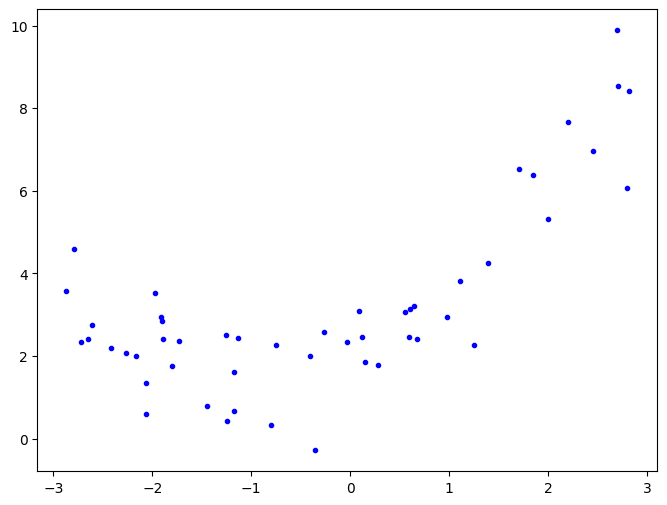

In [3]:
# Numero de pontos a serem gerados.
m = 50

# Valores de x, na forma de uma matriz-coluna m por 1.
X = 6 * np.random.rand(m, 1) - 3

# Valores de y sem ruido, que são uma função quadrática de x.
y_clean = 0.5 * X**2 + X + 2

# Adicionando ruido à y.
y = y_clean + np.random.randn(m, 1)

# Vamos ver como ficou.
plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.", linewidth=3)
plt.show()

Nosso objetivo será ajustar vários modelos lineares polinomiais aos dados, com diferentes graus de polinômio, e compará-los:

- Modelo linear de grau $1$: $\hat{y} = \theta_0 + \theta_1 x$
- Modelo linear de grau $2$: $\hat{y} = \theta_0 + \theta_1 x + \theta_2 x^2$
- Modelo linear de grau $30$: $\hat{y} = \theta_0 + \theta_1 x + \cdots + \theta_{30} x^{30}$

In [4]:
def experimento(X, y, degree):
    # Cria a pipeline.
    pipe = Pipeline([
        ("poly_features", PolynomialFeatures(
            degree=degree,
            include_bias=False,
        )),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ])

    # Ajusta a pipeline nos dados de treinamento.
    pipe.fit(X, y)

    # Imprime os parametros obtidos no ajuste de modelo.
    def print_title(title):
        msg = f'Parâmetros do {title}'
        print(msg)
        print('-' * len(msg))

    def print_array(name, arr):
        print(name)
        pprint(arr)
        print()

    scaler = pipe.named_steps['std_scaler']
    print_title('StandardScaler')
    print_array('mean:', scaler.mean_)
    print_array('scale:', scaler.scale_)

    model = pipe.named_steps['lin_reg']
    print_title('modelo linear')
    print_array('theta_0:', model.intercept_)
    print_array('Demais coeficientes theta_i:', model.coef_)

    # Coordenadas de teste para visualizar as predições efetuadas
    # pelo modelo ajustado.
    X_test = np.linspace(-3, 3, num=100).T

    # Calcula as predições da pipeline nos dados de teste.
    y_test = pipe.predict(X_test.reshape(-1, 1))

    # Vamos ver como ficou.
    plt.figure(figsize=(8, 6))
    plt.plot(X, y, "b.", linewidth=3)
    plt.plot(X_test, y_test, 'r-', label=f'grau {degree}')
    plt.xlabel('$X$')
    plt.ylabel('$y$', rotation=0)
    plt.axis([-3, 3, 0, 10])
    plt.title(f'Modelo de grau ${degree}$')
    plt.show()

No primeiro experimento, vamos usar um modelo linear de grau $1$:

Parâmetros do StandardScaler
----------------------------
mean:
array([-0.32445657])

scale:
array([1.71587867])

Parâmetros do modelo linear
---------------------------
theta_0:
array([3.19735398])

Demais coeficientes theta_i:
array([[1.52518782]])



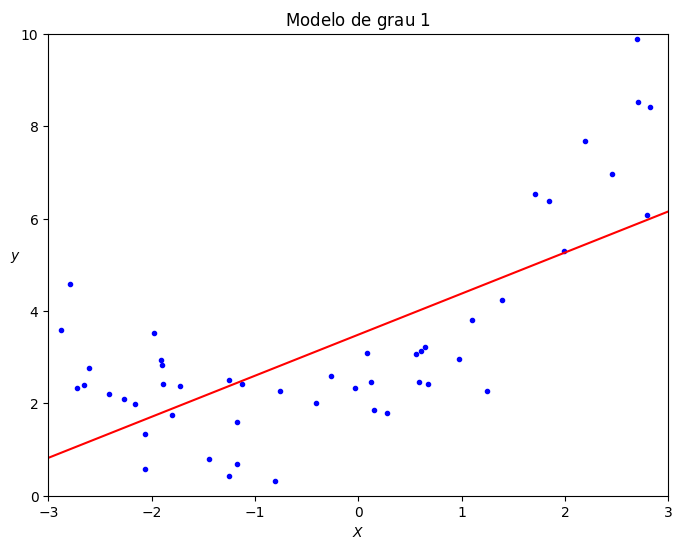

In [5]:
# Experimento 1: grau baixo.
experimento(X, y, degree=1)

No segundo experimento vamos usar um modelo polinomial de grau $2$. Este é o modelo que esperamos que atinja nosso *benchmark* de parâmetros.

Parâmetros do StandardScaler
----------------------------
mean:
array([-0.32445657,  3.04951168])

scale:
array([1.71587867, 2.67665834])

Parâmetros do modelo linear
---------------------------
theta_0:
array([3.19735398])

Demais coeficientes theta_i:
array([[1.65101609, 1.32814361]])



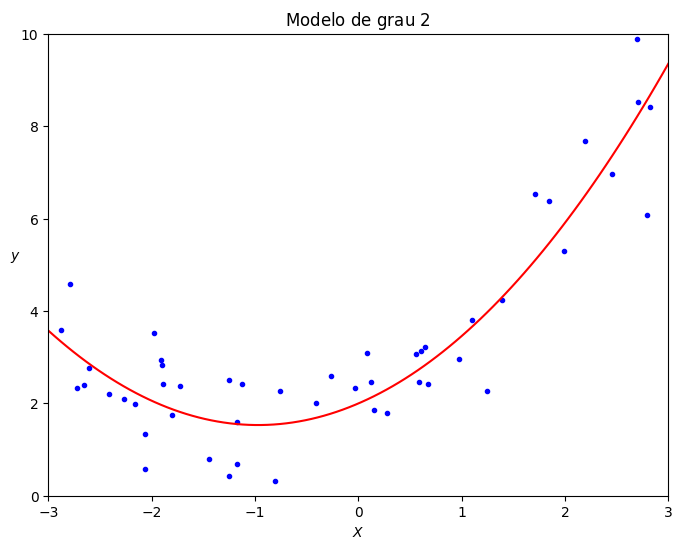

In [6]:
# Experimento 2: grau adequado.
experimento(X, y, degree=2)

No terceiro modelo vamos exagerar no grau do modelo polinomial, para ver o que acontece.

Parâmetros do StandardScaler
----------------------------
mean:
array([-3.24456574e-01,  3.04951168e+00, -1.42455777e+00,  1.64640213e+01,
       -6.72605427e+00,  1.04262610e+02, -3.56599259e+01,  7.12968758e+02,
       -2.10706975e+02,  5.09327028e+03, -1.37128474e+03,  3.73773683e+04,
       -9.66835537e+03,  2.79148225e+05, -7.24841783e+04,  2.11010738e+06,
       -5.68019602e+05,  1.60914222e+07, -4.58980394e+06,  1.23544025e+08,
       -3.78617104e+07,  9.53714088e+08, -3.16620869e+08,  7.39609213e+09,
       -2.67126432e+09,  5.75846163e+10, -2.26619619e+10,  4.49919136e+11,
       -1.92885498e+11,  3.52643759e+12])

scale:
array([1.71587867e+00, 2.67665834e+00, 1.01110457e+01, 2.10215308e+01,
       7.10494931e+01, 1.62808711e+02, 5.27140014e+02, 1.26561563e+03,
       4.00587378e+03, 9.87940398e+03, 3.08518017e+04, 7.74533696e+04,
       2.39773099e+05, 6.09914260e+05, 1.87648172e+06, 4.82362887e+06,
       1.47700385e+07, 3.83049211e+07, 1.16830110e+08, 3.05337359e+08,
      

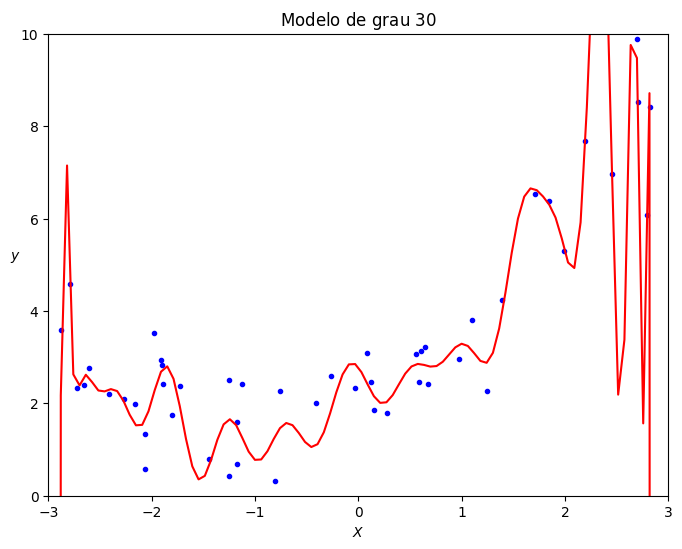

In [7]:
# Experimento 3: grau exagerado.
experimento(X, y, degree=30)

# Regularização

Conforme vimos acima, um modelo muito complexo pode sofrer do problema de *overfitting*. Uma forma de domar a complexidade do modelo é limitar o número de *features*. Por exemplo, usando *features* polinomiais, podemos limitar o grau do polinômio.

Outra forma de tratar a complexidade dos modelos é através da estratégia de *regularização*. Trata-se do seguinte:

1. Definimos métricas diferentes de erro para a fase de treinamento e a fase de testes.
    - Na fase de treinamento usamos uma *métrica regularizada*
    - Na fase de testes usamos uma métrica convencional
    
2. A métrica regularizada funciona assim: trata-se da métrica convencional acrescida de um termo que *penaliza a complexidade do modelo*.

Com isso favorecemos modelos de complexidade reduzida, mesmo que o grau do polinômio seja alto.

## Ridge, Lasso e ElasticNet

Nestas modalidades de regularização adicionamos uma penalidade para a norma do vetor de parâmetros:

- Ridge: a penalidade é proporcional à norma $L_2$ do vetor de parâmetros.

- Lasso: a penalidade é proporcional à norma $L_1$ do vetor de parâmetros.

- ElasticNet: uma soma ponderada de penalidades proporcionais às normas $L_1$ e $L_2$ do vetor de parâmetros é aplicada.


**Atividade:** O material do livro-texto, na seção "Regularized Linear Models" está muito bom, estude este material e responda:

- Qual a diferença entre *ridge regression*, *lasso regression*, e *elastic net*?

**R:** 
- Ridge regression: Adiciona um termo de regularização L2 à função de custo, que é a soma dos quadrados dos coeficientes multiplicada por um hiperparâmetro de regularização (alfa).
- Lasso regression: Adiciona um termo de regularização L1 à função de custo, que é a soma dos valores absolutos dos coeficientes multiplicada por um hiperparâmetro de regularização (alfa).
- Elastic Net: É uma mistura de Ridge e Lasso, e você pode controlar a mistura com um hiperparâmetro de mistura r. Quando r = 0, o Elastic Net é equivalente ao Ridge Regression, e quando r = 1, é equivalente ao Lasso Regression.

Eis aqui uma demonstração das várias regularizações:

In [8]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def outro_experimento(msg, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_pred, y_test))

    model = pipeline.named_steps['lin_reg']
    print(f'{msg}:')
    print(f'intercept = {model.intercept_}')
    print(f'coefs = {model.coef_}')
    print(f'RMSE: {RMSE}')
    print()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RAND_SEED,
)

In [10]:
def get_linear_regressor_pipeline(degree):
    pipe = Pipeline([
        ("poly_features", PolynomialFeatures(
            degree=degree,
            include_bias=False,
        )),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ])
    return pipe


poly_reg_1 = get_linear_regressor_pipeline(degree=1)
poly_reg_2 = get_linear_regressor_pipeline(degree=2)
poly_reg_30 = get_linear_regressor_pipeline(degree=30)

In [11]:
# Testa o fit do poly_reg_1.
outro_experimento(
    'Fit de grau 1, sem regularização',
    poly_reg_1,
    X_train,
    y_train,
    X_test,
    y_test,
)

# Testa o fit do poly_reg_2.
outro_experimento(
    'Fit de grau 2, sem regularização',
    poly_reg_2,
    X_train,
    y_train,
    X_test,
    y_test,
)

# Testa o fit do poly_reg_30.
outro_experimento(
    'Fit de grau 30, sem regularização',
    poly_reg_30,
    X_train,
    y_train,
    X_test,
    y_test,
)

Fit de grau 1, sem regularização:
intercept = [3.360575]
coefs = [[1.67617475]]
RMSE: 1.702493336371738

Fit de grau 2, sem regularização:
intercept = [3.360575]
coefs = [[1.71510893 1.30326142]]
RMSE: 0.9107993823957371

Fit de grau 30, sem regularização:
intercept = [3.36057715]
coefs = [[ 5.21089009e+00 -5.14886259e+01 -1.09288189e+03  3.57965179e+03
   6.36823024e+04 -9.70038599e+04 -1.63020208e+06  1.16318387e+06
   2.26831407e+07 -5.48922451e+06 -1.92333931e+08 -1.24237026e+07
   1.06294771e+09  2.93851464e+08 -3.98839075e+09 -1.70975045e+09
   1.04024137e+10  5.63231449e+09 -1.90421822e+10 -1.19427753e+10
   2.43634452e+10  1.69053081e+10 -2.13261291e+10 -1.59275921e+10
   1.21661721e+10  9.60767098e+09 -4.07481457e+09 -3.36135413e+09
   6.07756496e+08  5.19170457e+08]]
RMSE: 10.449699640942622



In [12]:
# Coeficiente de regularização para os experimentos a seguir.
alpha = 1e-1

In [13]:
# Testa o fit da regularização ridge.
poly_reg_ridge = Pipeline([
    ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", Ridge(alpha=alpha)),
])
outro_experimento(
    'Fit de grau 30, regularização ridge',
    poly_reg_ridge,
    X_train,
    y_train,
    X_test,
    y_test,
)

Fit de grau 30, regularização ridge:
intercept = [3.360575]
coefs = [[ 1.59489135  0.47725162 -0.14309992  1.84019522  0.29249355 -0.09997135
   0.55562415 -0.82304453  0.47348413 -0.69401326  0.23625941 -0.28265974
  -0.02258788  0.11461831 -0.23984397  0.38638718 -0.38934537  0.50981467
  -0.46040085  0.49764216 -0.44828742  0.37362782 -0.35104929  0.16231733
  -0.16877412 -0.11466856  0.09646245 -0.43957431  0.44065482 -0.79835976]]
RMSE: 0.9832711742670776



In [14]:
# Test o fit da regularização lasso.
poly_reg_lasso = Pipeline([
    ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", Lasso(alpha=alpha)),
])
outro_experimento(
    'Fit de grau 30, regularização lasso',
    poly_reg_lasso,
    X_train,
    y_train,
    X_test,
    y_test,
)

Fit de grau 30, regularização lasso:
intercept = [3.360575]
coefs = [ 1.62337143  1.04555095  0.          0.15754791  0.          0.
  0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.03492852  0.        ]
RMSE: 0.9771858165029841



In [15]:
# Test o fit da regularização elastic net.
poly_reg_elasticnet = Pipeline([
    ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=RAND_SEED)),
])
outro_experimento(
    'Fit de grau 30, regularização elastic net',
    poly_reg_elasticnet,
    X_train,
    y_train,
    X_test,
    y_test,
)

Fit de grau 30, regularização elastic net:
intercept = [3.360575]
coefs = [ 1.29913462e+00  7.96283926e-01  4.15268618e-01  4.15539891e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.53951279e-04 -0.00000000e+00
 -4.30119505e-02 -0.00000000e+00 -7.10400198e-02 -0.00000000e+00
 -7.98690417e-02 -0.00000000e+00]
RMSE: 1.030641130301162



**Atividade:** 

- Coloque o $\alpha$ bem alto, o que acontece?

- Coloque o $\alpha$ muito baixo, o que acontece?

- Explique a diferença observada entre sem regularização / regularização ridge / regularização lasso / regularização elastic net.

**R:**
Se o alpha é muito alto, todos os coeficientes são próximos de zero e o resultado é uma linha horizontal passando pela média dos dados. Se o alpha é muito baixo, o modelo é equivalente ao modelo sem regularização. A diferença entre sem regularização / regularização ridge / regularização lasso / regularização elastic net é que a regularização ridge e elastic net tendem a ter coeficientes mais próximos de zero do que a regularização lasso, enquanto a regularização lasso tende a eliminar completamente os coeficientes de menor importância.

## Regularização por parada prematura (*early stopping*)

Um modo bizarro de regularização é o chamado *early stopping*.

Considere o algoritmo de treinamento *gradient descent*. Quanto mais iteramos neste algoritmo (em machine learning, as iterações são chamadas **epochs**), menor o *erro de treinamento*. Porém, se acompanharmos o *erro de validação* à cada epoch, vemos que este decresce com as epochs até um certo ponto, *e depois começa a subir novamente*!

<img src="early_stopping_plot.png" alt="Regularização por parada prematura" style="width: 600px;"/>


**Atividade:** Por que isso acontece?

**R:** O erro de validação por epoch começa a subir a partir de um ponto pois o modelo começa a se overfittar em relação aos dados de treinamento, e começa a perder a capacidade de generalizar para dados novos.

Continuando:

Portanto, se detectarmos que o erro de validação está realmente subindo, podemos parar com o processo de treinamento e adotar o modelo resultante como o nosso modelo treinado! Esta estratégia de *parada prematura* (early stopping) é surpreendentemente simples e eficaz!

# Interpretabilidade

In [17]:
import statsmodels.api as sm

In [38]:
pipe = PolynomialFeatures(degree=2, include_bias=True)
Xb = pipe.fit_transform(X)

model = sm.OLS(y, Xb)
results = model.fit()

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     116.3
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           6.27e-19
Time:                        23:55:06   Log-Likelihood:                -66.076
No. Observations:                  50   AIC:                             138.2
Df Residuals:                      47   BIC:                             143.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9964      0.201      9.938      0.000       1.592       2.401
x1             0.9622      0.077     12.421      0.000       0.806       1.118
x2             0.4962      0.050      9.992      0.000       0.396       0.596
==============================================================================
Omnibus:                        2.083   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.593
Skew:                          -0.437   Prob(JB):                        0.451
Kurtosis:                       3.029   Cond. No.                         6.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Atividade:**

Experimente com diferentes valores para o grau do polinômio: 1, 2, 5, 10. Relate o que você observou

**R:** Quanto maior o grau do polinômio, maior o R quadrado e menor o erro quadrático médio, porém menor o F-statistic (ou seja, a significância do modelo cai por conta de overfitting).